<a href="https://colab.research.google.com/github/weedge/doraemon-nb/blob/main/lsh_random_projection_simp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Random Projection

In this notebook we will demonstrate a few aspects to LSH with random projection.

First, we will create our normal vectors.

In [1]:
nbits = 4  # number of hyperplanes and binary vals to produce
d = 2  # vector dimensions

In [2]:
import numpy as np
# create a set of 4 hyperplanes, with 2 dimensions
plane_norms = np.random.rand(nbits, d) - .5
plane_norms

array([[-0.26013043, -0.30916898],
       [ 0.45810628, -0.24052132],
       [-0.26951437, -0.42872805],
       [-0.25704942, -0.03125735]])

These normal vectors will be used to return +ve/-ve dot product values for different vectors - producing our hashed binary vectors. Let's visualize the direction of these normal vectors first.

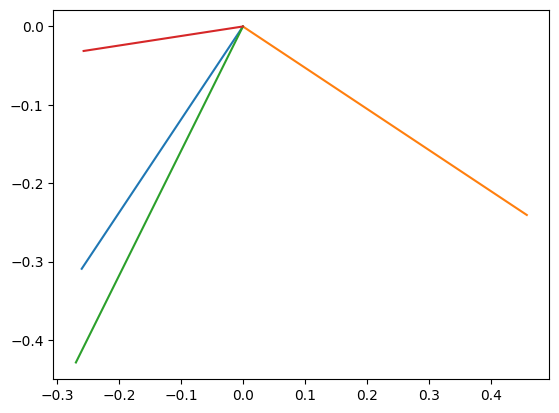

In [3]:
import matplotlib.pyplot as plt

for norm in plane_norms:
    plt.plot([0, norm[0]], [0, norm[1]])

Looks good, now we will create a set of vectors to convert into binary format - these are `a`, `b`, and `c`.

In [4]:
a = np.asarray([1, 2])
b = np.asarray([2, 1])
c = np.asarray([3, 1])

Calculate the dot-product between each and the normal vectors we built before.

In [5]:
# calculate the dot product for each of these
a_dot = np.dot(a, plane_norms.T)
b_dot = np.dot(b, plane_norms.T)
c_dot = np.dot(c, plane_norms.T)
a_dot

array([-0.87846839, -0.02293636, -1.12697048, -0.31956412])

And use the dot-product to create a Boolean array, we convert these values to ints - creating our hash buckets/binary vectors.

In [6]:
# we know that a positive dot product == +ve side of hyperplane
# and negative dot product == -ve side of hyperplane
a_dot = a_dot > 0
b_dot = b_dot > 0
c_dot = c_dot > 0
a_dot

array([False, False, False, False])

In [7]:
# finally, we convert our boolean arrays to int arrays to make bucketing
# easier (although we can still use boolean values for Hamming distance)
a_dot = a_dot.astype(int)
b_dot = b_dot.astype(int)
c_dot = c_dot.astype(int)
a_dot

array([0, 0, 0, 0])

In [8]:
b_dot

array([0, 1, 0, 0])

In [9]:
c_dot

array([0, 1, 0, 0])

And now we bucket each of our vectors, `a`, `b`, and `c` will be represented by `0`, `1`, and `2` respectively.

In [10]:
vectors = [a_dot, b_dot, c_dot]
buckets = {}
i = 0

for i in range(len(vectors)):
    # convert from array to string
    hash_str = ''.join(vectors[i].astype(str))
    # create bucket if it doesn't exist
    if hash_str not in buckets.keys():
        buckets[hash_str] = []
    # add vector position to bucket
    buckets[hash_str].append(i)

print(buckets)

{'0000': [0], '0100': [1, 2]}
